In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,KFold,cross_val_score,StratifiedKFold
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data = pd.read_excel(r"C:\Users\Nahid\Desktop\sentiment\dataset.xlsx",encoding='utf-8')

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
x = tf.fit_transform(data['comment'])
y = data.emotion

NN: 0.485388
RF: 0.577594
KNN: 0.545238
DT: 0.484737
NB: 0.533947
SVM: 0.588127


<IPython.core.display.Javascript object>


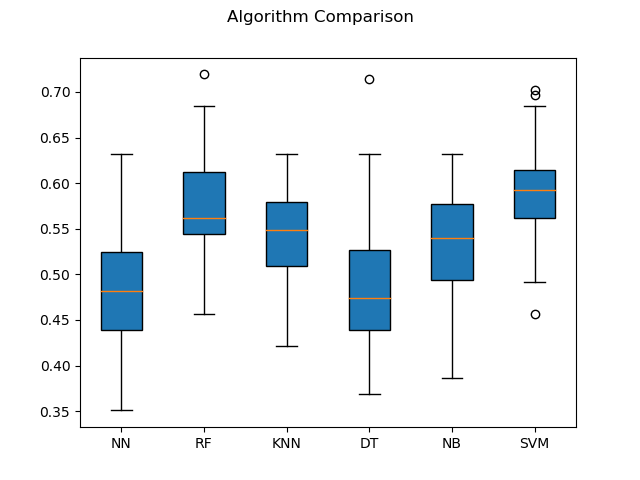

In [4]:
seed = 50

# preparing models
models = []
models.append(('NN', MLPClassifier(hidden_layer_sizes=(18,18,18), max_iter = 900, activation = 'relu')))
models.append(('RF', RandomForestClassifier(n_estimators=80)))
models.append(('KNN', GridSearchCV(KNeighborsClassifier(), { "n_neighbors" : [5, 7, 11, 13, 17] })))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('SVM', SVC(kernel='rbf')))

n = 50
#cv = KFold(n_splits=n,shuffle=True)
cv = StratifiedKFold(n_splits=n, shuffle=True)
# evaluating each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
     cv_results = cross_val_score(model, x, y, cv=cv, scoring=scoring)       
     results.append(cv_results)
     names.append(name)
     msg = "%s: %f" % (name, cv_results.mean())
     print(msg)

# boxplot algorithm comparison

#plt.style.use('ggplot')
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, patch_artist = True)
ax.set_xticklabels(names)
plt.show() 